Imports

In [1]:
%load_ext autoreload
%autoreload 2

import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.models import resnet34

from MLProject2Dataset import MLProject2Dataset
from CNNModels import SimpleCNN, ComplexCNN, ComplexCNNMeta
from helper_functions import display_conf_matrix, plot_training_progress, train_net, test_net, print_elapsed_time
from timeit import default_timer as timer

Επιλογή συσκευής

In [2]:
# device = ("cuda" if torch.cuda.is_available()
#           else "mps" if torch.backends.mps.is_available()
#           else "cpu")

device= 'cpu'

Ορισμός κλάσεων προβλέψεων

In [3]:
classes = {
    0: 'MEL',
    1: 'NV',
    2: 'BCC',
    3: 'AKIEC',
    4: 'BKL',
    5: 'DF',
    6: 'VASC'
}

# 4. Απλό ΣΝΔ

## 4.1 Δημιουργία υποσυνόλου εκπαίδευσης, δοκιμής

In [4]:
image_transforms = transforms.Compose([
            transforms.Resize((50, 62), antialias=True),
            transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
        ])

dataset = MLProject2Dataset('./data/dermoscopy_classification', transform=image_transforms, meta=False)

generator = torch.Generator().manual_seed(42)
train, validate, test = torch.utils.data.random_split(dataset, [0.6, 0.1, 0.3], generator)

In [5]:
BATCH_SIZE = 128
train_dataloader = DataLoader(train, batch_size=BATCH_SIZE, shuffle=True)
validate_dataloader = DataLoader(validate, batch_size=BATCH_SIZE, shuffle=False)
test_dataloader = DataLoader(test, batch_size=BATCH_SIZE, shuffle=False)

In [6]:
model = SimpleCNN().to(device)
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1)

## 4.2 Εκπαίδευση

In [7]:
epochs, t_loss, t_acc, v_loss, v_acc = train_net(model, train_dataloader, validate_dataloader, optimizer = optimizer, loss=loss_fn, device=device, print_period=10, epochs=20)

Training on cpu


Epochs completed:   0%|          | 0/20 [00:00<?, ?it/s]

[Epoch: 1, batch: 10] Train loss: 1.547, Train acc: 0.615 | Validation loss: 1.045, Validation acc: 0.687
[Epoch: 1, batch: 20] Train loss: 1.071, Train acc: 0.680 | Validation loss: 1.148, Validation acc: 0.687
[Epoch: 1, batch: 30] Train loss: 1.024, Train acc: 0.680 | Validation loss: 1.001, Validation acc: 0.687
[Epoch: 1, batch: 40] Train loss: 1.073, Train acc: 0.641 | Validation loss: 0.961, Validation acc: 0.686
---Epoch 1 report | Train loss 1.155, Train accuracy 0.656 | Validation loss 0.949, Validation accuracy: 0.687
[Epoch: 2, batch: 3] Train loss: 1.012, Train acc: 0.665 | Validation loss: 0.970, Validation acc: 0.686
[Epoch: 2, batch: 13] Train loss: 1.046, Train acc: 0.658 | Validation loss: 1.000, Validation acc: 0.659
[Epoch: 2, batch: 23] Train loss: 1.005, Train acc: 0.656 | Validation loss: 0.924, Validation acc: 0.686
[Epoch: 2, batch: 33] Train loss: 0.973, Train acc: 0.664 | Validation loss: 0.948, Validation acc: 0.687
[Epoch: 2, batch: 43] Train loss: 0.904, T

## 4.3 Γράφημα απώλειας και ευστοχίας

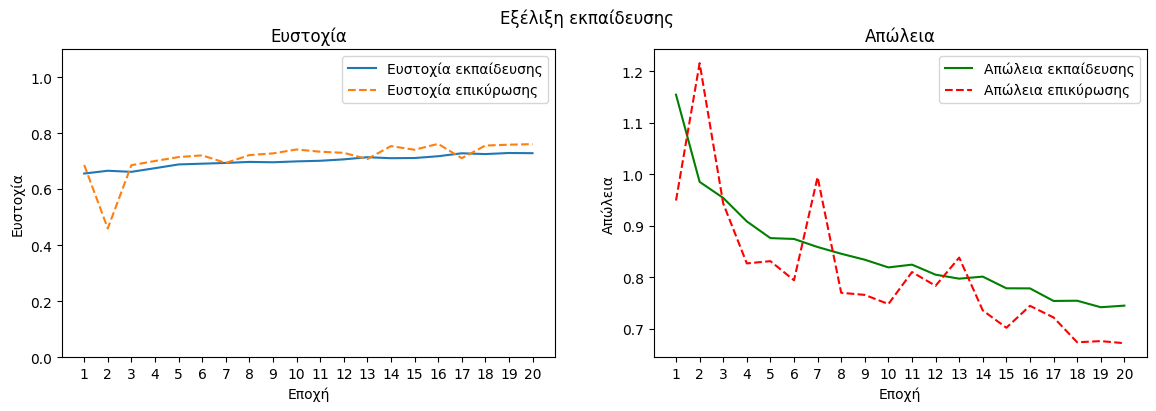

In [8]:
plot_training_progress(epochs, t_acc, v_acc, t_loss, v_loss)

## 4.4 Αξιολόγηση μοντέλου στο σύνολο δοκιμής

In [9]:
y_preds = test_net(model, test_dataloader, loss_fn, device)

Average loss: 0.0060. Test accuracy in 2987 images: 0.7228


## 4.5 Υπολογισμός πίνακα σύγχησης

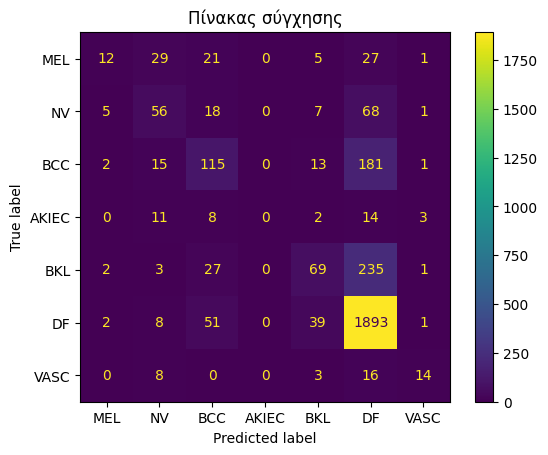

In [10]:
display_conf_matrix(y_preds, test, classes)

# 5. Σύνθετο ΣΝΔ

## 5.1 Δημιουργία υποσυνόλου εκπαίδευσης, δοκιμής

In [11]:
image_transforms = transforms.Compose([
            transforms.Resize((100, 125), antialias=True),
            transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
        ])

dataset = MLProject2Dataset('./data/dermoscopy_classification', transform=image_transforms)

generator = torch.Generator().manual_seed(42)
train, validate, test = torch.utils.data.random_split(dataset, [0.6, 0.1, 0.3], generator)

In [12]:
BATCH_SIZE = 128
train_dataloader = DataLoader(train, batch_size=BATCH_SIZE, shuffle=True)
validate_dataloader = DataLoader(validate, batch_size=BATCH_SIZE, shuffle=False)
test_dataloader = DataLoader(test, batch_size=BATCH_SIZE, shuffle=False)

In [13]:
model = ComplexCNN().to(device)
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

## 5.2 Εκπαίδευση

In [14]:
epochs, t_loss, t_acc, v_loss, v_acc = train_net(model, train_dataloader, validate_dataloader, optimizer = optimizer, loss=loss_fn, device=device, print_period=10, epochs=20)

Training on cpu


Epochs completed:   0%|          | 0/20 [00:00<?, ?it/s]

[Epoch: 1, batch: 10] Train loss: 1.485, Train acc: 0.577 | Validation loss: 1.473, Validation acc: 0.696
[Epoch: 1, batch: 20] Train loss: 0.892, Train acc: 0.687 | Validation loss: 1.179, Validation acc: 0.686
[Epoch: 1, batch: 30] Train loss: 0.761, Train acc: 0.723 | Validation loss: 1.044, Validation acc: 0.691
[Epoch: 1, batch: 40] Train loss: 0.801, Train acc: 0.709 | Validation loss: 0.840, Validation acc: 0.724
---Epoch 1 report | Train loss 0.957, Train accuracy 0.681 | Validation loss 0.790, Validation accuracy: 0.723
[Epoch: 2, batch: 3] Train loss: 0.778, Train acc: 0.727 | Validation loss: 0.798, Validation acc: 0.724
[Epoch: 2, batch: 13] Train loss: 0.727, Train acc: 0.708 | Validation loss: 0.655, Validation acc: 0.762
[Epoch: 2, batch: 23] Train loss: 0.674, Train acc: 0.748 | Validation loss: 0.691, Validation acc: 0.738
[Epoch: 2, batch: 33] Train loss: 0.628, Train acc: 0.772 | Validation loss: 0.631, Validation acc: 0.778
[Epoch: 2, batch: 43] Train loss: 0.690, T

## 5.3 Γράφημα απώλειας και ευστοχίας

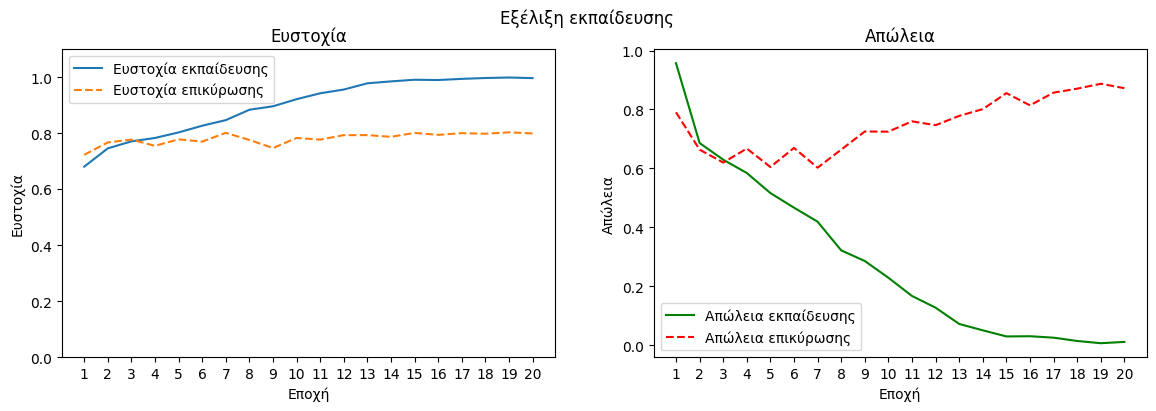

In [15]:
plot_training_progress(epochs, t_acc, v_acc, t_loss, v_loss)

## 5.4 Αξιολόγηση μοντέλου στο σύνολο δοκιμής

In [16]:
y_preds = test_net(model, test_dataloader, loss_fn, device)

Average loss: 0.0083. Test accuracy in 2987 images: 0.7657


## 5.5 Υπολογισμός πίνακα σύγχησης

In [ ]:
display_conf_matrix(y_preds, test, classes)

# 6. Μεταφορά μάθησης

## 6.1 Δημιουργία υποσυνόλου εκπαίδευσης, δοκιμής

In [17]:
data_transforms = {
        'train' : transforms.Compose([
            transforms.RandomResizedCrop(224, antialias=True),
            transforms.RandomHorizontalFlip(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        'val' : transforms.Compose([
            transforms.Resize(256, antialias=True),
            transforms.CenterCrop(224),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
    }

dataset_train = MLProject2Dataset('./data/dermoscopy_classification', transform=data_transforms['train'])
dataset_val = MLProject2Dataset('./data/dermoscopy_classification', transform=data_transforms['val'])

generator = torch.Generator().manual_seed(42)
train, _, _ = torch.utils.data.random_split(dataset_train, [0.6, 0.1, 0.3], generator)
generator = torch.Generator().manual_seed(42)
_, validate, test = torch.utils.data.random_split(dataset_val, [0.6, 0.1, 0.3], generator)

BATCH_SIZE = 128
train_dataloader = DataLoader(train, batch_size=BATCH_SIZE, shuffle=True)
validate_dataloader = DataLoader(validate, batch_size=BATCH_SIZE, shuffle=False)
test_dataloader = DataLoader(test, batch_size=BATCH_SIZE, shuffle=False)

In [18]:
model = resnet34(weights='DEFAULT').to(device)
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

## 6.2 Εκπαίδευση

In [19]:
epochs, t_loss, t_acc, v_loss, v_acc = train_net(model, train_dataloader, validate_dataloader, optimizer = optimizer, loss=loss_fn, device=device, print_period=10, epochs=5)

Training on cpu


Epochs completed:   0%|          | 0/5 [00:00<?, ?it/s]

[Epoch: 1, batch: 10] Train loss: 6.490, Train acc: 0.173 | Validation loss: 3.267, Validation acc: 0.675


KeyboardInterrupt: 

## 6.3 Γράφημα απώλειας και ευστοχίας

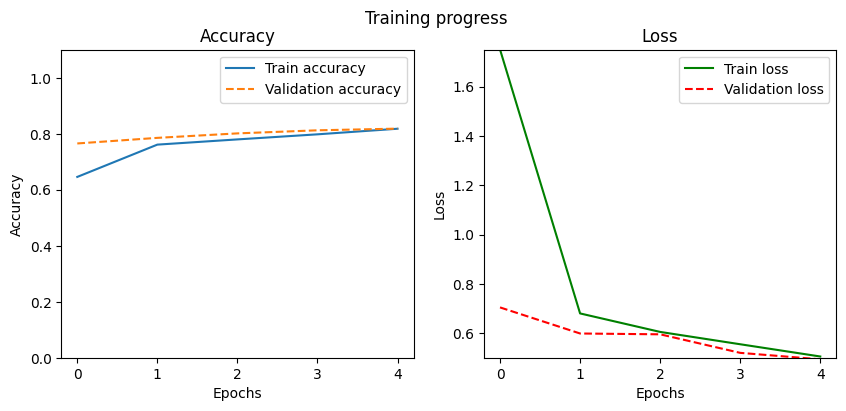

In [ ]:
plot_training_progress(epochs, t_acc, v_acc, t_loss, v_loss)

## 6.4 Αξιολόγηση μοντέλου στο σύνολο δοκιμής

In [ ]:
y_preds = test_net(model, test_dataloader, loss_fn, device)

KeyboardInterrupt: 

## 6.5 Υπολογισμός πίνακα σύγχησης

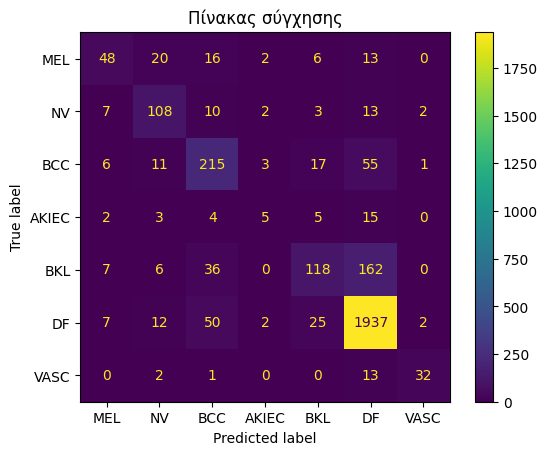

Train time on cuda: 3499.986 seconds


In [ ]:
display_conf_matrix(y_preds, test, classes)

# Bonus 7. Αξιοποίηση δημογραφικών μεταβλητών

## 7.1 Δημιουργία υποσυνόλου εκπαίδευσης, δοκιμής

In [ ]:
image_transforms = transforms.Compose([
            transforms.Resize((100, 125), antialias=True),
            transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
        ])

dataset = MLProject2Dataset('./data/dermoscopy_classification', transform=image_transforms, meta=True)

generator = torch.Generator().manual_seed(42)
train, validate, test = torch.utils.data.random_split(dataset, [0.6, 0.1, 0.3], generator)

In [ ]:
BATCH_SIZE = 256
train_dataloader = DataLoader(train, batch_size=BATCH_SIZE, shuffle=True)
validate_dataloader = DataLoader(validate, batch_size=BATCH_SIZE, shuffle=False)
test_dataloader = DataLoader(test, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
model = ComplexCNNMeta().to(device)
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.001)

## 7.2 Εκπαίδευση

In [ ]:
epochs, t_loss, t_acc, v_loss, v_acc = train_net(model, train_dataloader, validate_dataloader, optimizer = optimizer, loss=loss_fn, device=device, print_period=10, epochs=20)

Training on cuda


Epochs completed:   0%|          | 0/5 [00:00<?, ?it/s]

/home/mike/HUA/ML/Deliverables/Excersise2/MLProject2Dataset.py:66: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (image, torch.tensor(self.metadata.loc[idx, 'age':], dtype=torch.float), self.dataset.at[idx, 'dx'].astype('long'))


[Epoch: 1, batch: 10] Train loss: 1.768, Train acc: 0.389 | Validation loss: 1.999, Validation acc: 0.037
[Epoch: 1, batch: 20] Train loss: 1.162, Train acc: 0.623 | Validation loss: 1.960, Validation acc: 0.054
---Epoch 1 report | Train loss 1.397, Train accuracy 0.527 | Validation loss 1.844, Validation accuracy: 0.386
[Epoch: 2, batch: 6] Train loss: 1.007, Train acc: 0.671 | Validation loss: 1.581, Validation acc: 0.673
[Epoch: 2, batch: 16] Train loss: 0.931, Train acc: 0.692 | Validation loss: 1.176, Validation acc: 0.697
---Epoch 2 report | Train loss 0.929, Train accuracy 0.690 | Validation loss 0.979, Validation accuracy: 0.709
[Epoch: 3, batch: 2] Train loss: 0.886, Train acc: 0.701 | Validation loss: 0.950, Validation acc: 0.714
[Epoch: 3, batch: 12] Train loss: 0.870, Train acc: 0.693 | Validation loss: 0.859, Validation acc: 0.722
[Epoch: 3, batch: 22] Train loss: 0.801, Train acc: 0.718 | Validation loss: 0.809, Validation acc: 0.729
---Epoch 3 report | Train loss 0.840, 

## 7.3 Γράφημα απώλειας και ευστοχίας

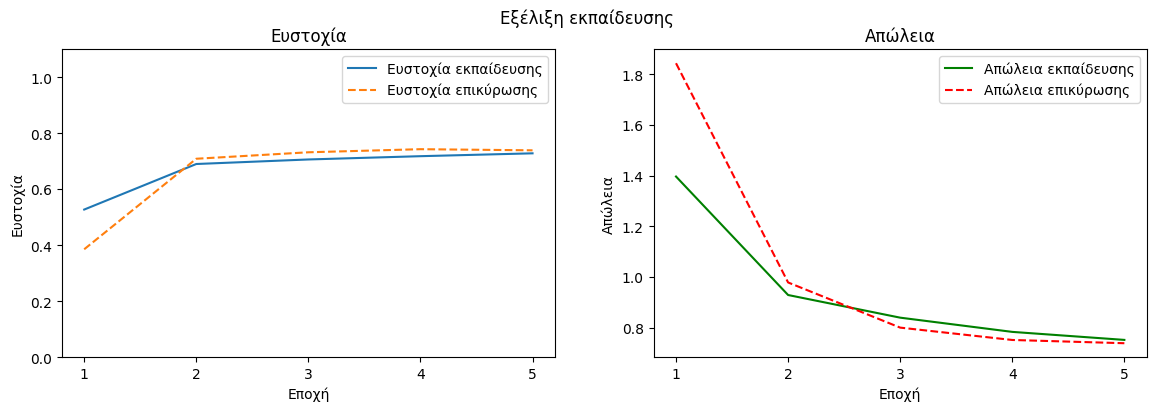

In [ ]:
plot_training_progress(epochs, t_acc, v_acc, t_loss, v_loss)

## 7.4 Αξιολόγηση μοντέλου στο σύνολο δοκιμής

In [ ]:
y_preds = test_net(model, test_dataloader, loss_fn, device)

Average loss: 0.0033. Test accuracy in 2987 images: 0.7134


## 7.5 Υπολογισμός πίνακα σύγχησης

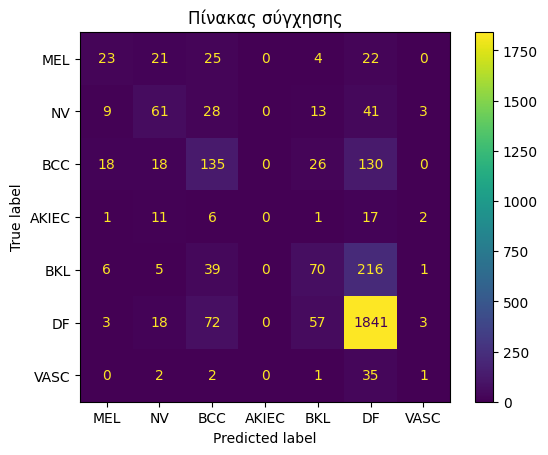

In [ ]:
display_conf_matrix(y_preds, test, classes)

# Print total time since start_time
# print_elapsed_time(start=start_time, end=timer(), device=device)